In [1]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt

DEVICE = torch.device('mps') # use 'mps' for MacOS, 'cuda' for Nvidia GPU, or 'cpu'

In [3]:
# 載入模型與修改結構
model = models.resnext50_32x4d(weights=None)
model.fc = torch.nn.Linear(model.fc.in_features, 3)
model.load_state_dict(torch.load("weights/rps_resnext_model.pth", map_location=DEVICE))
model.eval().to(DEVICE)

# 預處理設定
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

class_names = ["Rock", "Paper", "Scissors"]

In [4]:
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        outputs = model(input_tensor)
        pred_idx = outputs.argmax(1).item()
        label = class_names[pred_idx]
    
    # 顯示結果
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Prediction: {label}")
    plt.show()
    return label

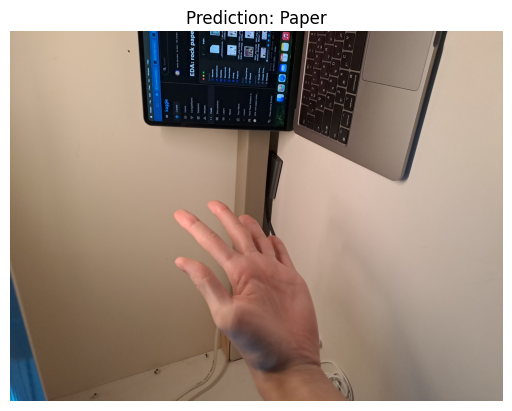

'Paper'

In [6]:
predict_image("images/p.jpeg")